# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [4]:

iris_data = load_iris()
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [34]:
iris_data.keys()
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data.data, columns =iris_data.feature_names)
#     df.columns =df.columns.str.replace('[(cm)]','')
    df.columns =[name.replace('(cm)','').strip() for name in df.columns]
    #add the columns targetnames and values with column name target and class
    df['target'] =iris_data.target
    df['class'] =iris_data.target_names[iris_data.target]
    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
49,5.0,3.3,1.4,0.2,0,setosa
110,6.5,3.2,5.1,2.0,2,virginica
112,6.8,3.0,5.5,2.1,2,virginica
93,5.0,2.3,3.3,1.0,1,versicolor
146,6.3,2.5,5.0,1.9,2,virginica
25,5.0,3.0,1.6,0.2,0,setosa
114,5.8,2.8,5.1,2.4,2,virginica
61,5.9,3.0,4.2,1.5,1,versicolor
94,5.6,2.7,4.2,1.3,1,versicolor
115,6.4,3.2,5.3,2.3,2,virginica


In [38]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [50]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = df_iris[['sepal length','sepal width','petal length','petal width']].values
# raise NotImplementedError()

In [51]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [60]:
mergings = 0 
# YOUR CODE HERE
samples =x
mergings = linkage(samples,'complete')
mergings
# raise NotImplementedError()

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

In [58]:
# mergings = 0 
# # YOUR CODE HERE
# # normalize
# samples =normalize(x)
# mergings = linkage(samples,'complete')
# mergings

In [59]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

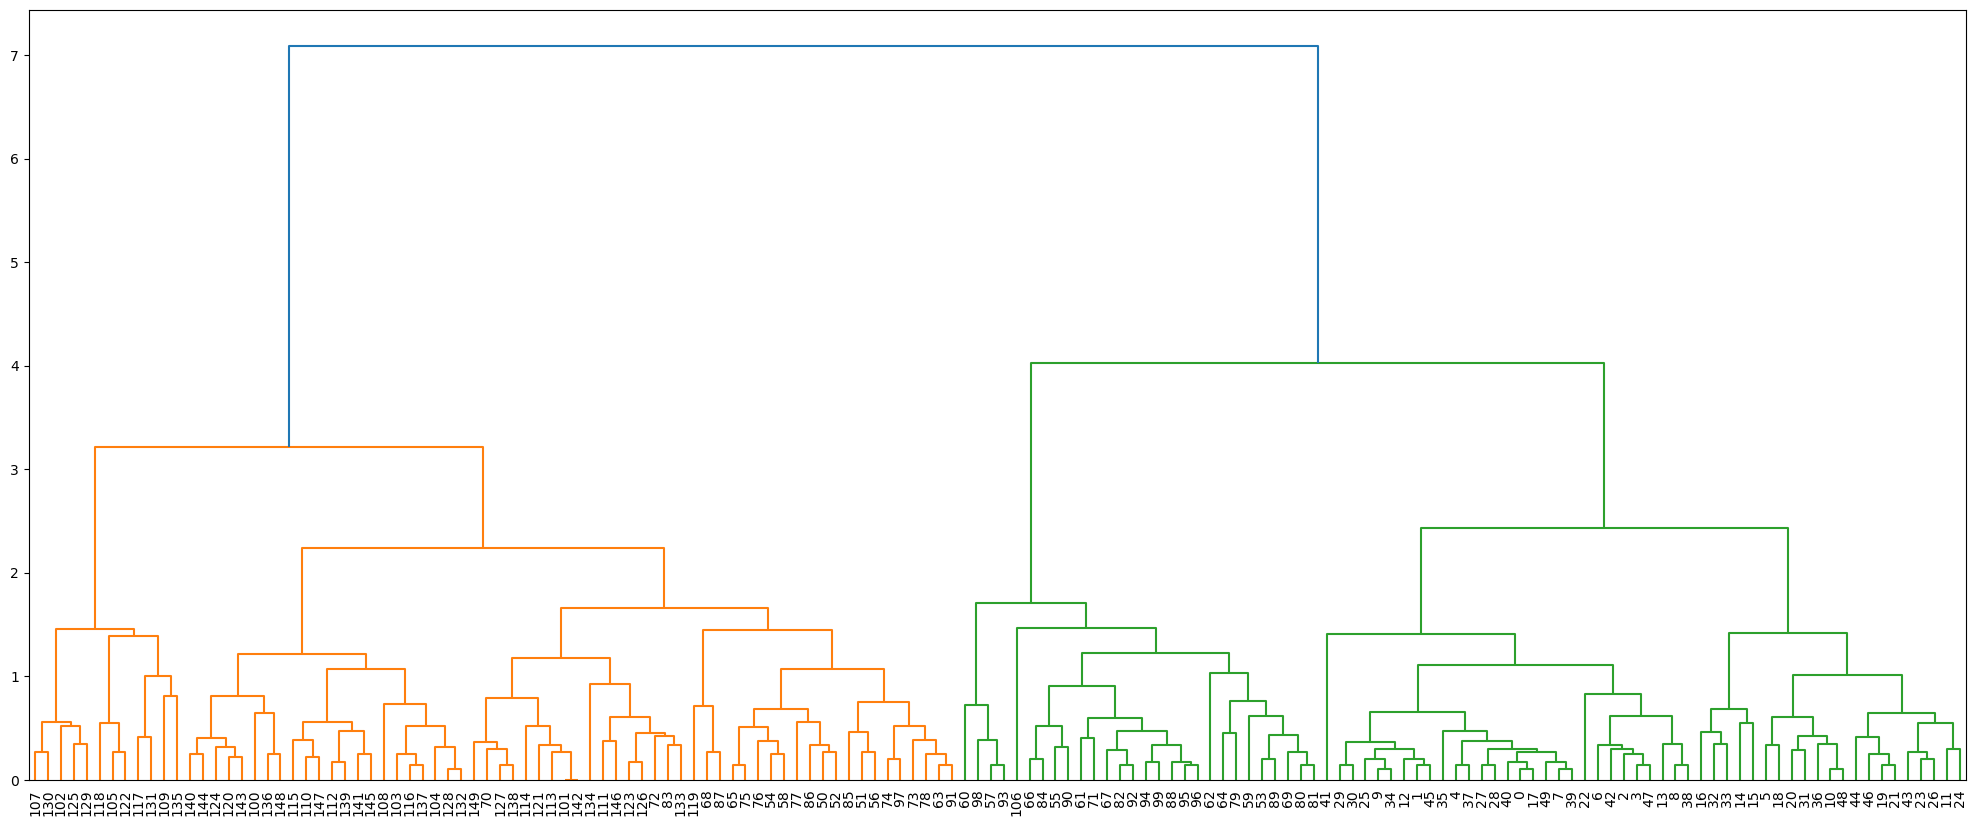

In [65]:
dn = 0
# YOUR CODE HERE
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=10)
plt.show()
# raise NotImplementedError()

In [67]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [4]:
from sklearn.cluster import KMeans

df = pd.read_csv('ch1ex1.csv')
points = df.values

new_df = pd.read_csv('ch1ex2.csv')
new_points = new_df.values


In [80]:
print(points.shape)
new_points.shape

(300, 2)


(100, 2)

**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [5]:
model = 0
# YOUR CODE HERE
model =KMeans(n_clusters=3)


In [76]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [6]:
# YOUR CODE HERE
model=model.fit(points)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [7]:
# YOUR CODE HERE
labels =model.predict(points)
print(labels.shape)
print(labels[labels.argmax()])
labels
# raise NotImplementedError()

(300,)
2


array([2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0])

In [8]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [104]:
# df['labels']=labels


In [9]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    
#     using pandas
#     df['labels']=labels
#     data_0 =df[df['labels']== 0].values
#     data_1 =df[df['labels']== 1].values
#     data_2 =df[df['labels']== 2].values
#     raise NotImplementedError()

# using numpy
    for i in range(len(points)):
        if labels[i] == 0:
            data_0.append(points[i])
        if labels[i] == 1:
            data_1.append(points[i])
        if labels[i] == 2:
            data_2.append(points[i])
            
    data_0=np.array(data_0)
    data_1=np.array(data_1)
    data_2=np.array(data_2)
            
    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)
data_2

(95, 2)
(94, 2)
(111, 2)


array([[ 0.06544649, -0.76866376],
       [-0.26175155, -0.62492939],
       [ 0.42291856, -0.7349534 ],
       [-0.0257849 , -1.18672539],
       [-0.15394596, -0.71704301],
       [ 0.03844769, -0.74635022],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [ 0.08415721, -0.71564326],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [-0.07961882, -0.85677394],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.34307757, -0.79999275],
       [ 0.26151216, -0.26069251],
       [-0.17722723,

In [107]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

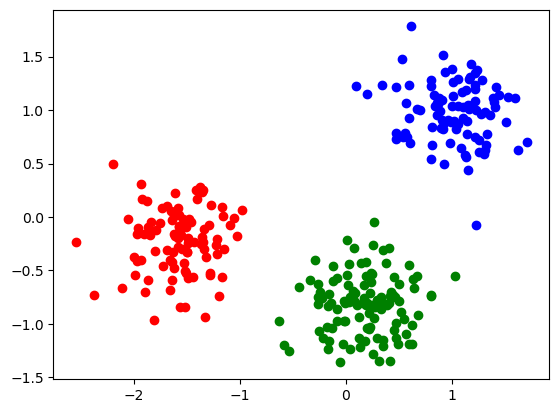

In [10]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1],c='r')
plt.scatter(data_1[:,0],data_1[:,1],c='b')
plt.scatter(data_2[:,0],data_2[:,1],c='g')
plt.show()
# raise NotImplementedError()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [11]:

# YOUR CODE HERE
new_labels =model.predict(new_points)
# raise NotImplementedError()


In [132]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [12]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE
new_0,new_1,new_2 = separate_labels(new_labels, new_points)
# raise NotImplementedError()


In [134]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

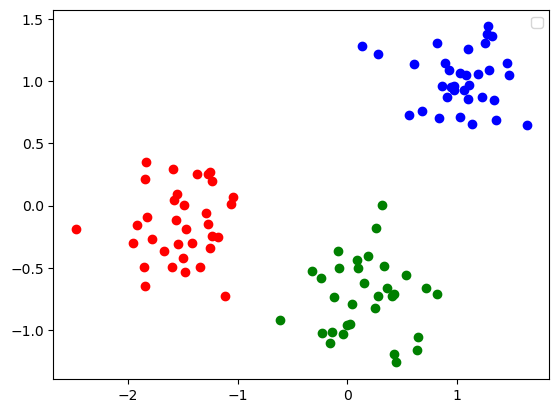

No handles with labels found to put in legend.


In [23]:
#plot the new labels


# YOUR CODE HERE
plt.scatter(new_0[:,0],new_0[:,1],c='r',label=0)
plt.scatter(new_1[:,0],new_1[:,1],c='b',label=1)
plt.scatter(new_2[:,0],new_2[:,1],c='g',label=2)
plt.show()
plt.legend()
# raise NotImplementedError()

In [17]:
model.cluster_centers_

array([[-1.57568905, -0.22531944],
       [ 1.01378685,  0.98288627],
       [ 0.18034887, -0.81701955]])

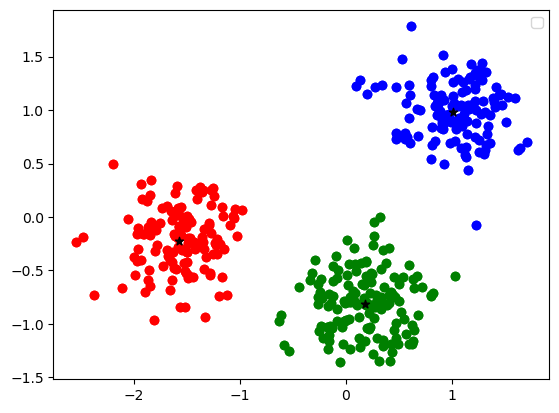

No handles with labels found to put in legend.


In [22]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(data_0[:,0],data_0[:,1],c='r')
plt.scatter(data_1[:,0],data_1[:,1],c='b')
plt.scatter(data_2[:,0],data_2[:,1],c='g')

plt.scatter(new_0[:,0],new_0[:,1],c='r')
plt.scatter(new_1[:,0],new_1[:,1],c='b')
plt.scatter(new_2[:,0],new_2[:,1],c='g')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='k', marker='*',label='centroid')
plt.show()
plt.legend()
# raise NotImplementedError()